# Network Use Cases... maybe

#### Rifqi Ardia Ramadhan

## 1. DNS over HTTPS Detection (?)

DNS is becoming more and more secure. But with this security comes new problem. Recently, DNS-over-HTTPS gained popularity due to its guaranteed privacy of DNS. But this is a nightmare for Network Administrator, because they can't monitor DNS queries, block certain website that has malicious entity, or measuring compliance. This use case will try to detect DNS tunneling to improve enterprise network monitoring capabilities.


## 2. DNS Tunneling - Infiltration

DNS has the ability to query a domain with a TXT domain description embedded with it. But this ability can be abused for malware to infiltrate a machine, because usually DNS queries are ignored by network administrator. With this ability, malware can query a domain from a malicious DNS resolver, that will return malicious code embedded in TXT record.

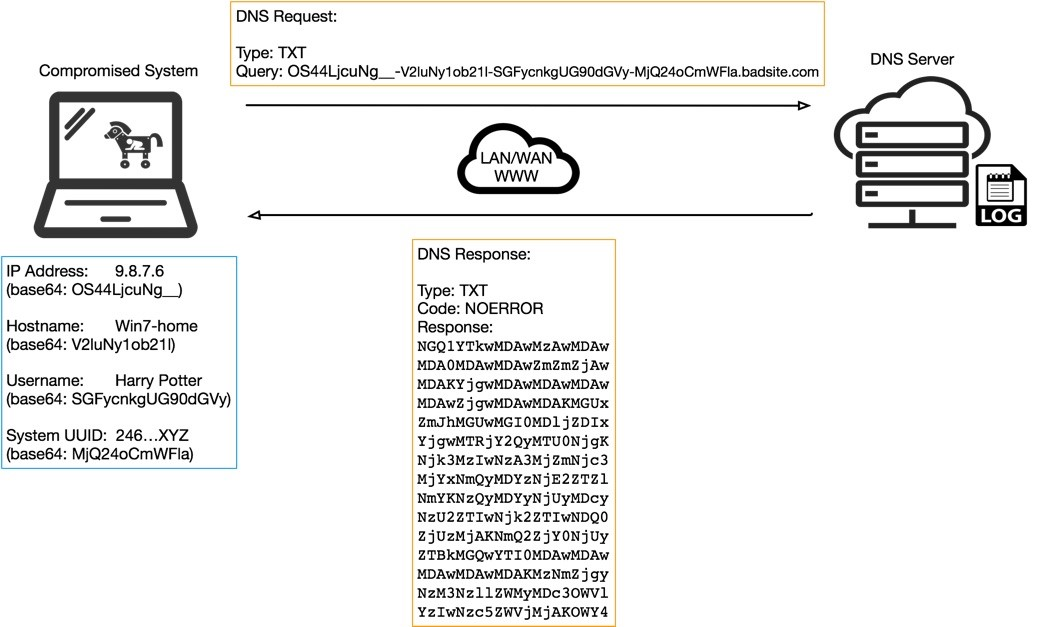
Example C2 DNS query with TXT type response diagram from PaloAlto networks.

Picture above is a good illustration on how DNS infiltration works. This use case will try to detect DNS infiltration to prevent injection of malicious entity.

## 3. ICMP Tunneling

ICMP has the ability to send arbitrary data over the network. For any type 0 (echo reply) or type 8 (echo message) ICMP packet allows a custom message to be sent for checking whether the request and response message match. This tunneling can be used to do infiltration against machines. Normal ICMP packets are usually 42 bytes. More than that, the content needs to be checked. This use case will try to detect arbitrary messages that is sent from ICMP.

## 4. BitTorrent

BitTorrent is a torrent client utilizes P2P technology to download large files from various peers. Rather than downloading files from one server, which can be congested if there are many client requested it, torrent makes it possible to gather more "servers" to get more bandwidth. In personal view, this is a great tool to maximize download bandwidth, but in enterprise perspective, moreover network administrator and system administrator, this is a nightmare because of legal problems and traffic congestion. This use case will try to detect offenders that uses BitTorrent in a company setting.

BitTorrent has its own protocol for handshake (before actually sending files) that is supported by Wireshark. So, even small packet of BitTorrent protocol will be recognized on Wireshark.

## 5. Port Scanning

Port scanning is a useful tool to check whether certain port is open or not. This tool is used by adversary to recon a target. This use case will try to detect if any source is scanning defender's port, and most likely from same host.

## 6. Wannacry Propagation (?)

Wannacry is a ransomware that emerges in 2017. It uses the EternalBlue exploit and DOUBLEPULSAR backdoor to propagate and spread itself through local and remote machines (if sites allow NetBIOS packets from outside network). No one really sure where the initial infection started because of the NetBIOS behaviour.

This use case will try to detect Wannacry propagation. The obvious characteristics of this ransomware's propagation is probing a random IP (including external IP address a.k.a internet), and if SMB exists, it will try to exploit it. Uniquely enough, along with this probed random IP, it will also try to probe two hardcoded IP; `192.168.56.20` and `172.16.99.5`. Wannacry will try to send three NetBIOS session setup packets, in which two of them are the above IPs.

## 7. EternalBlue Exploit

EternalBlue is a Windows Exploit that exploits SMB version 1 that can carry remote code execution with specially crafted request. Patch was issued in March 2017, but adversaries still can exploit if victim does not update their Windows to the latest version. 

The more technical detail explained [here](https://research.checkpoint.com/2017/eternalblue-everything-know/). This article will only explain about the detection.

This use case will try to detect EternalBlue exploitation via network. The first detection is the use of NT Trans Request with bunch of NOPs. This large NT Trans request will lead to many secondary Trans2 Requests with also large request size. This requests contain malicious code and encrypted payload. Then after the request, Trans2 should respond with `STATUS_INVALID_PARAMETER`, indicating that the overwrite has been successful. To check whether the payload is installed, by searching SMB Multiplex ID == 82. If it exists, then the payload is successfully installed.

### References

https://youtu.be/144uhgJE3mg

https://unit42.paloaltonetworks.com/dns-tunneling-how-dns-can-be-abused-by-malicious-actors/

https://www.cloudflare.com/learning/dns/dns-records/dns-txt-record/

https://attack.mitre.org/techniques/T1071/004/

https://en.wikipedia.org/wiki/ICMP_tunnel

https://www.ietf.org/rfc/rfc792.txt

https://www.linkedin.com/pulse/bittorrent-traffic-detection-enterprise-network-safeer-muhammed/

https://www.mcafee.com/blogs/other-blogs/mcafee-labs/analysis-wannacry-ransomware/

https://www.researchgate.net/publication/332088162_WannaCry_Ransomware_Analysis_of_Infection_Persistence_Recovery_Prevention_and_Propagation_Mechanisms

https://www.hackers-arise.com/post/2018/11/30/network-forensics-part-2-packet-level-analysis-of-the-eternalblue-exploit

https://research.checkpoint.com/2017/eternalblue-everything-know/

### Note 
`(?)` means that I'm still unsure whether that could work or not.